# 房价预测

In [87]:
import tensorflow as tf
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

## 导入数据

In [88]:
df = pd.read_csv('data1.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 3 columns):
2104      46 non-null int64
3         46 non-null int64
399900    46 non-null int64
dtypes: int64(3)
memory usage: 1.2 KB


In [89]:
df.columns = ['area', 'room_count', 'menoy']
df.head()

,area,room_count,menoy
0,1600,3,329900
1,2400,3,369000
2,1416,2,232000
3,3000,4,539900
4,1985,4,299900


In [150]:
x_data = df[['area', 'room_count']].values
print(x_data.shape)
# 减去平均值并除以标准偏差
mean = x_data.mean(axis=0)
std = x_data.std(axis=0)
x_data = (x_data - mean) / std
x_data[:3,:]

(46, 2)


array([[-0.50145768, -0.22866478],
       [ 0.50539755, -0.22866478],
       [-0.73303438, -1.54348727]])

In [151]:
y_data = df['menoy'].values
y_data.shape = (46,1)
mean = y_data.mean(axis=0)
std = y_data.std(axis=0)
y_data = (y_data - mean) / std
y_data[:3]

array([[-0.07391816],
       [ 0.23957103],
       [-0.85884375]])

## 搭建模型

### 定义add_layer()函数

In [152]:
# 参数：(输入数据, 前一个神经元个数, 下一层神经元个数, 激活函数)
def add_layer(inputs, in_size, out_size, activation_function=None):
    Weights = tf.Variable(tf.random_normal([in_size, out_size]))
    biases = tf.Variable(tf.zeros([1, out_size]) + 0.1)
    Wx_plus_b = tf.matmul(inputs, Weights) + biases
    if activation_function is None:
        outputs = Wx_plus_b
    else:
        outputs = activation_function(Wx_plus_b)
    return outputs

### 定义占位符

In [153]:
# x,y 样本,一定要是浮点数。None代表无论输入有多少都可以
x = tf.placeholder(tf.float32, [46, 2]) # 两个输入变量
y = tf.placeholder(tf.float32, [46, 1]) # 一个输出变量

### 搭建网络

In [154]:
# 第一层网络
Z1 = add_layer(x, 2, 10, tf.nn.sigmoid)
# 第二层网络
prediction = add_layer(Z1, 10, 1, tf.nn.sigmoid)

In [155]:
# 损失函数
loss = tf.reduce_mean(tf.square(y - prediction))

In [156]:
# 使用梯度下降法最小化误差以此来更新权重
train = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

## 训练模型

### 启动会话

In [157]:
# 初始化变量  
init = tf.global_variables_initializer()

In [158]:
# 启动会话
sess = tf.Session()
sess.run(init)

### 开始训练

In [159]:
for step in range(1000):
    sess.run(train, feed_dict={x:x_data, y:y_data})

### 获取预测值

In [160]:
# 获取预测值
prediction_value = sess.run(prediction, feed_dict={x: x_data})
prediction_value

array([[4.4009387e-03],
       [4.0736735e-01],
       [2.7737021e-03],
       [9.2510623e-01],
       [4.3815106e-02],
       [3.3376217e-03],
       [2.2599697e-03],
       [1.9446909e-03],
       [2.8614402e-03],
       [3.4213066e-02],
       [4.2502522e-02],
       [2.0930380e-02],
       [9.8207808e-01],
       [1.4225841e-03],
       [2.5505626e-01],
       [1.9666553e-03],
       [1.3148189e-03],
       [7.0389819e-01],
       [9.3107319e-01],
       [1.0112017e-02],
       [2.9129356e-02],
       [4.4794679e-03],
       [3.8577944e-02],
       [9.7696209e-01],
       [9.8380446e-04],
       [2.5124252e-03],
       [5.9099776e-01],
       [1.5304449e-01],
       [7.2007585e-01],
       [2.2187859e-02],
       [1.3779402e-03],
       [5.9770644e-02],
       [9.3719411e-01],
       [1.7598242e-02],
       [2.3370683e-03],
       [1.3242662e-03],
       [1.0154486e-01],
       [9.8137265e-01],
       [1.2065023e-01],
       [8.6051822e-03],
       [1.9055197e-01],
       [6.520300

### 可视化

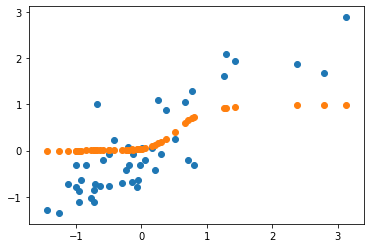

In [163]:
from matplotlib import pyplot as plt
%matplotlib inline

# 画图
plt.figure()
# plt.ion()  #interactive mode on
# 绘制样本点，真实值
plt.scatter(x_data[:, 0], y_data)
# 预测结果
plt.scatter(x_data[:, 0], prediction_value)
plt.pause(0.001)
plt.show()